<a href="https://colab.research.google.com/github/Sambaran04/Tensorflow/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

In this notebook we're going to learn how to write neural networks for classificatio problem.

A classification is where you try to classify
something as one thing or another

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

In [3]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples =1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [5]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [7]:
# X = tf.cast(X, tf.float32)
# y = tf.cast(y, tf.float32)

In [8]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X":X[:,1], "label":y})
circles

,X0,X,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


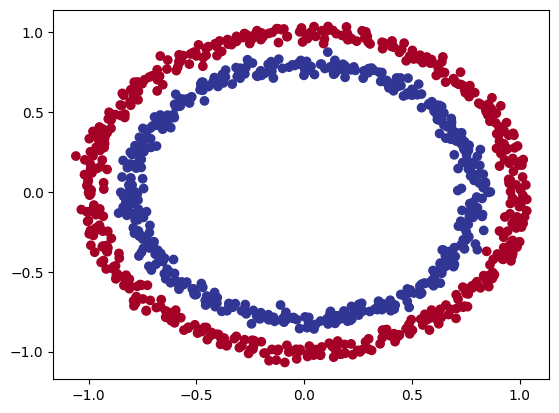

In [9]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input & Output Shapes

In [10]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [12]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving our model

Let's look into our bag of trics to see how we can improve our model.
  1. Create a model- we might to add more layers or increase the number of hidden units within a layer.
  2. Compiling a model- here we might to choose a different optimization function such as Adam instead of SGD.
  3. Fitting a model- perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_2 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5090


[0.6960136294364929, 0.5090000033378601]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (Where each unique class falls)

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() +0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi class
  if len(y_pred[0])>1:
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
  else:
    print("Doing binary classificaion")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classificaion


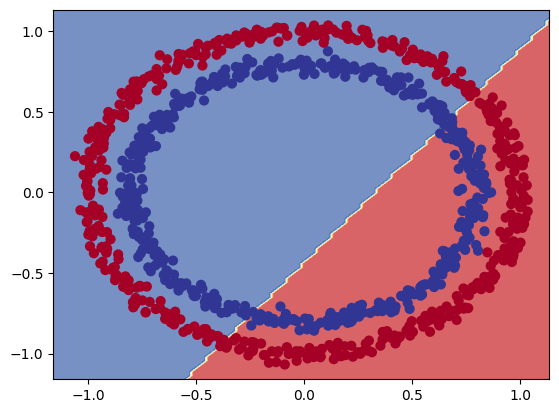

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [17]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_2.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100, verbose=0)
model_3.evaluate(X_reg_train, y_reg_train)

5/5 [==============================] - 0s 3ms/step - loss: 38.0158 - mae: 38.0158


[38.01581573486328, 38.01581573486328]

2/2 [==============================] - 0s 6ms/step


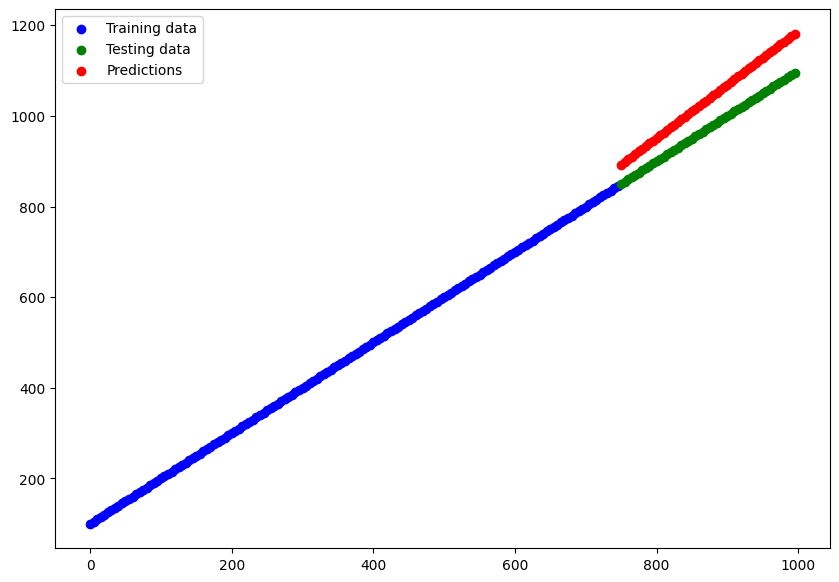

In [19]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-Linearity

In [20]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

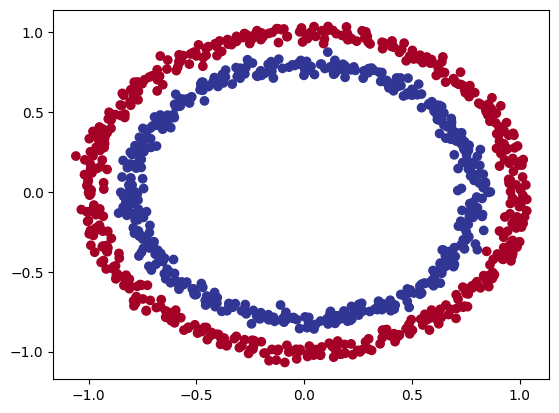

In [21]:
# Check out our data
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classificaion


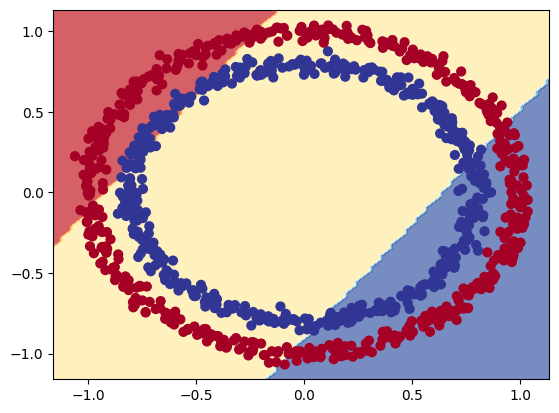

In [22]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

313/313 [==============================] - 1s 3ms/step
Doing binary classificaion


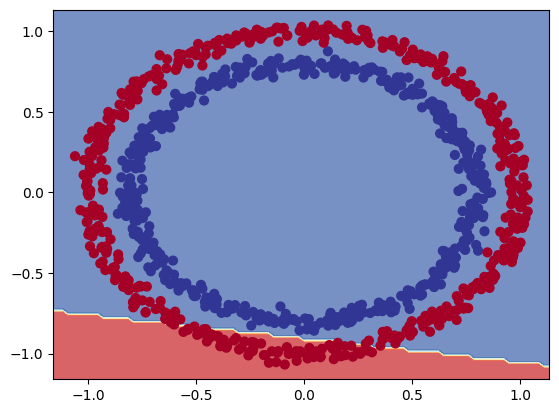

In [24]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),# can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=200, verbose=0)
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5690


[0.6624060869216919, 0.5690000057220459]

313/313 [==============================] - 1s 2ms/step
Doing binary classificaion


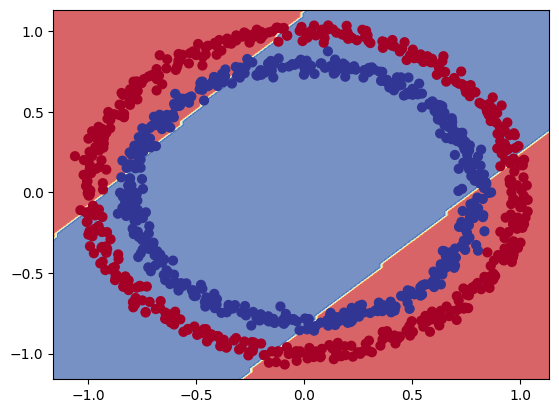

In [26]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)
model_7.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 0.9970


[0.11323477327823639, 0.996999979019165]

313/313 [==============================] - 1s 2ms/step
Doing binary classificaion


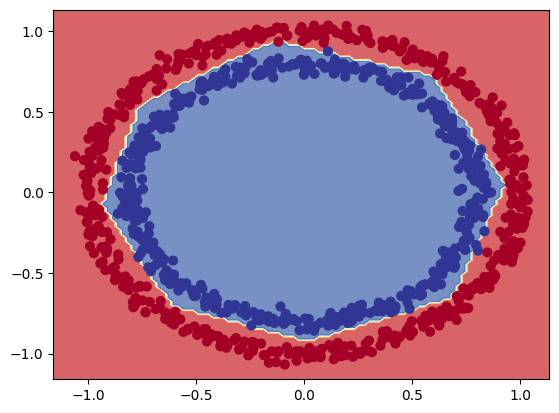

In [28]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...
However, in machine learning this is basically a sin.
So let's create a training and test set

In [29]:
# Check how many examples we have
len(X)

1000

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [32]:
# Let's recreate a model to fit on the trainiing data and evaluate on the testing data

# Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=500)
model_8.evaluate(X_test, y_test)

Epoch 1/500
25/25 [==============================] - 2s 4ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5038
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5063
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5063
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5063
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5163
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5263
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5437
Epoch 10/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5487
Epoch 11/

[0.04100125655531883, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
Doing binary classificaion
313/313 [==============================] - 1s 2ms/step
Doing binary classificaion


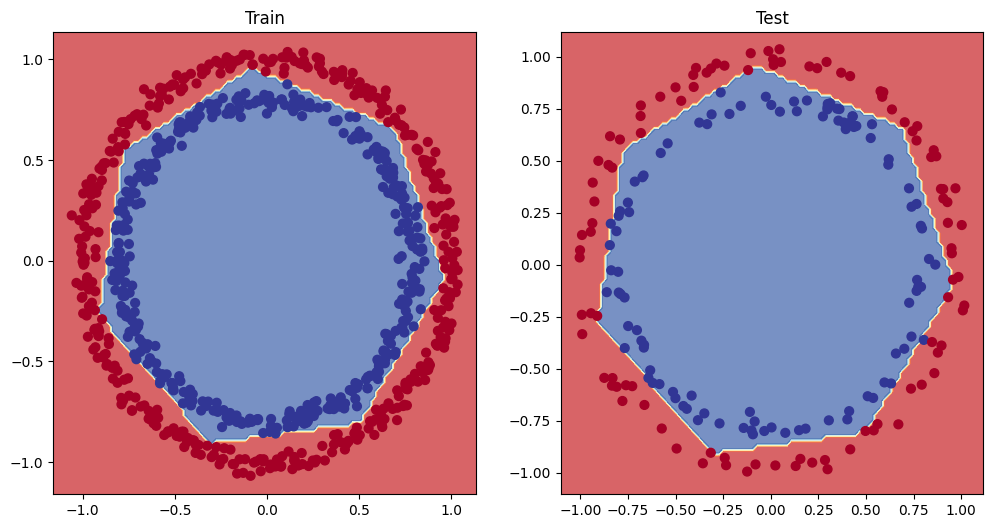

In [33]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

## Find the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your model while it's training
* Another model (We Could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.